In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sb.set()

In [2]:
nbaData = pd.read_csv('all_seasons.csv')
nbaData.head()


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [3]:
print(nbaData.dtypes)

Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object


In [4]:
nbaData.shape

(11700, 22)

# Data cleaning

Clean the data, notice that there are players that have no college or none (1 player), we will remove these entries.

In [5]:
cleaned_nba = nbaData[nbaData['college']!='No College']
cleaned_nba = cleaned_nba[cleaned_nba['college']!='None']

In [6]:
cleaned_nba.shape

(9984, 22)

C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.9% of the points cannot be

C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.6% of the points cannot be

C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ace\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.4% of the points cannot be p

<AxesSubplot:xlabel='pts', ylabel='college'>

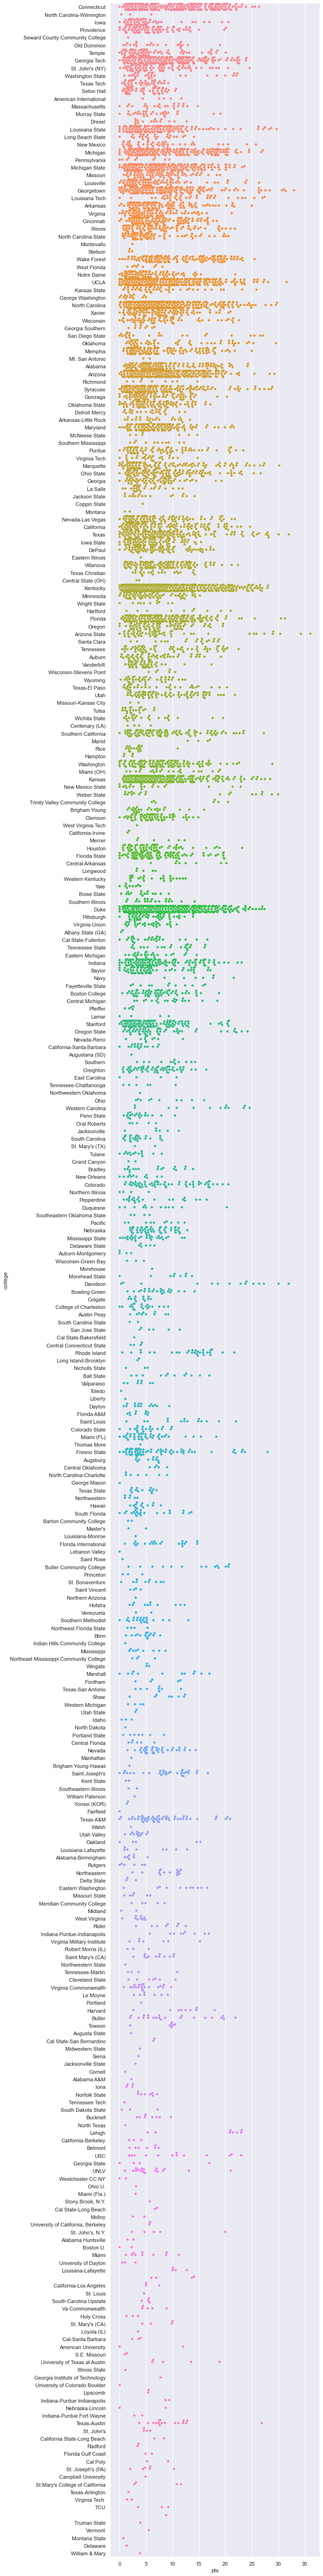

In [7]:
f = plt.figure(figsize=(8, 100))
sb.swarmplot(x = 'pts', y = 'college', data = cleaned_nba)

Examining all the colleges, we can see that the tail end of pts scored lies above 25 pts, lets zoom in on these colleges.

In [8]:
re_cleaned_nba=cleaned_nba[cleaned_nba['pts']>25]

In [9]:
re_cleaned_nba.shape

(127, 22)

<AxesSubplot:xlabel='pts', ylabel='college'>

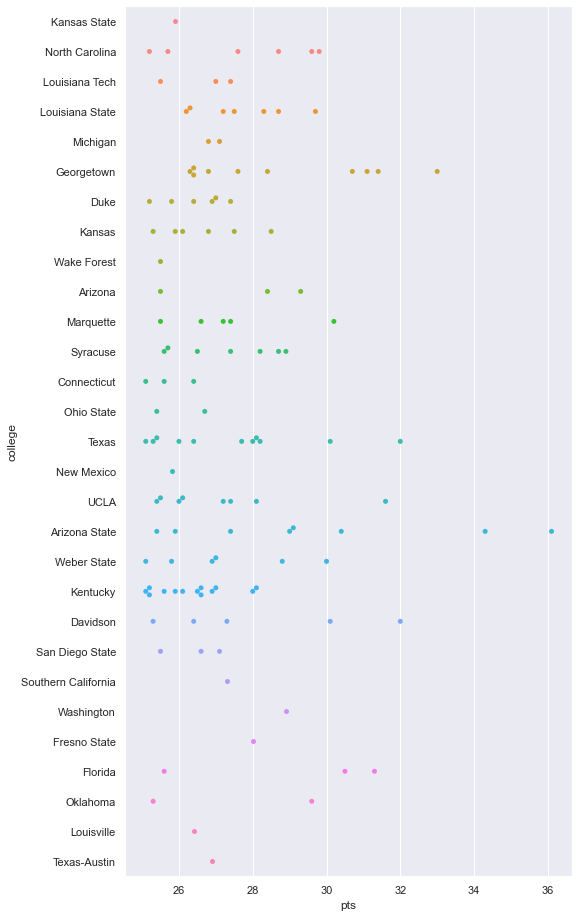

In [10]:
f = plt.figure(figsize=(8, 16))
sb.swarmplot(x = 'pts', y = 'college', data = re_cleaned_nba)

As we can see, Arizona State produces the best players, with both extreme outliers belonging to them

In [11]:
re_cleaned_nba['college'].value_counts()

Kentucky               13
Texas                  11
Georgetown             10
UCLA                    8
Arizona State           8
Louisiana State         7
Syracuse                7
Weber State             6
Duke                    6
North Carolina          6
Kansas                  6
Davidson                5
Marquette               5
San Diego State         3
Arizona                 3
Louisiana Tech          3
Connecticut             3
Florida                 3
Oklahoma                2
Michigan                2
Ohio State              2
Louisville              1
New Mexico              1
Kansas State            1
Washington              1
Texas-Austin            1
Fresno State            1
Southern California     1
Wake Forest             1
Name: college, dtype: int64

However, if we were to consider a 'good' player to be a player who has scored >25 points, it concludes that <br>
Kentucky university produces the most good players and hence it is the college producing the best players.

# Examining how weight and height affects pts scored

In [12]:
f = plt.figure(figsize=(180, 180))
sb.boxplot(y = 'pts', x = 'player_weight', data = cleaned_nba)

<AxesSubplot:xlabel='player_weight', ylabel='pts'>

In [13]:
cleaned_nba['player_weight'] = cleaned_nba.player_weight.astype(int)

In [14]:
cleaned_nba.player_weight

0        106
1        106
2        106
3        111
5        102
        ... 
11695     90
11696     99
11697     97
11698     98
11699    106
Name: player_weight, Length: 9984, dtype: int32

<AxesSubplot:xlabel='player_weight', ylabel='pts'>

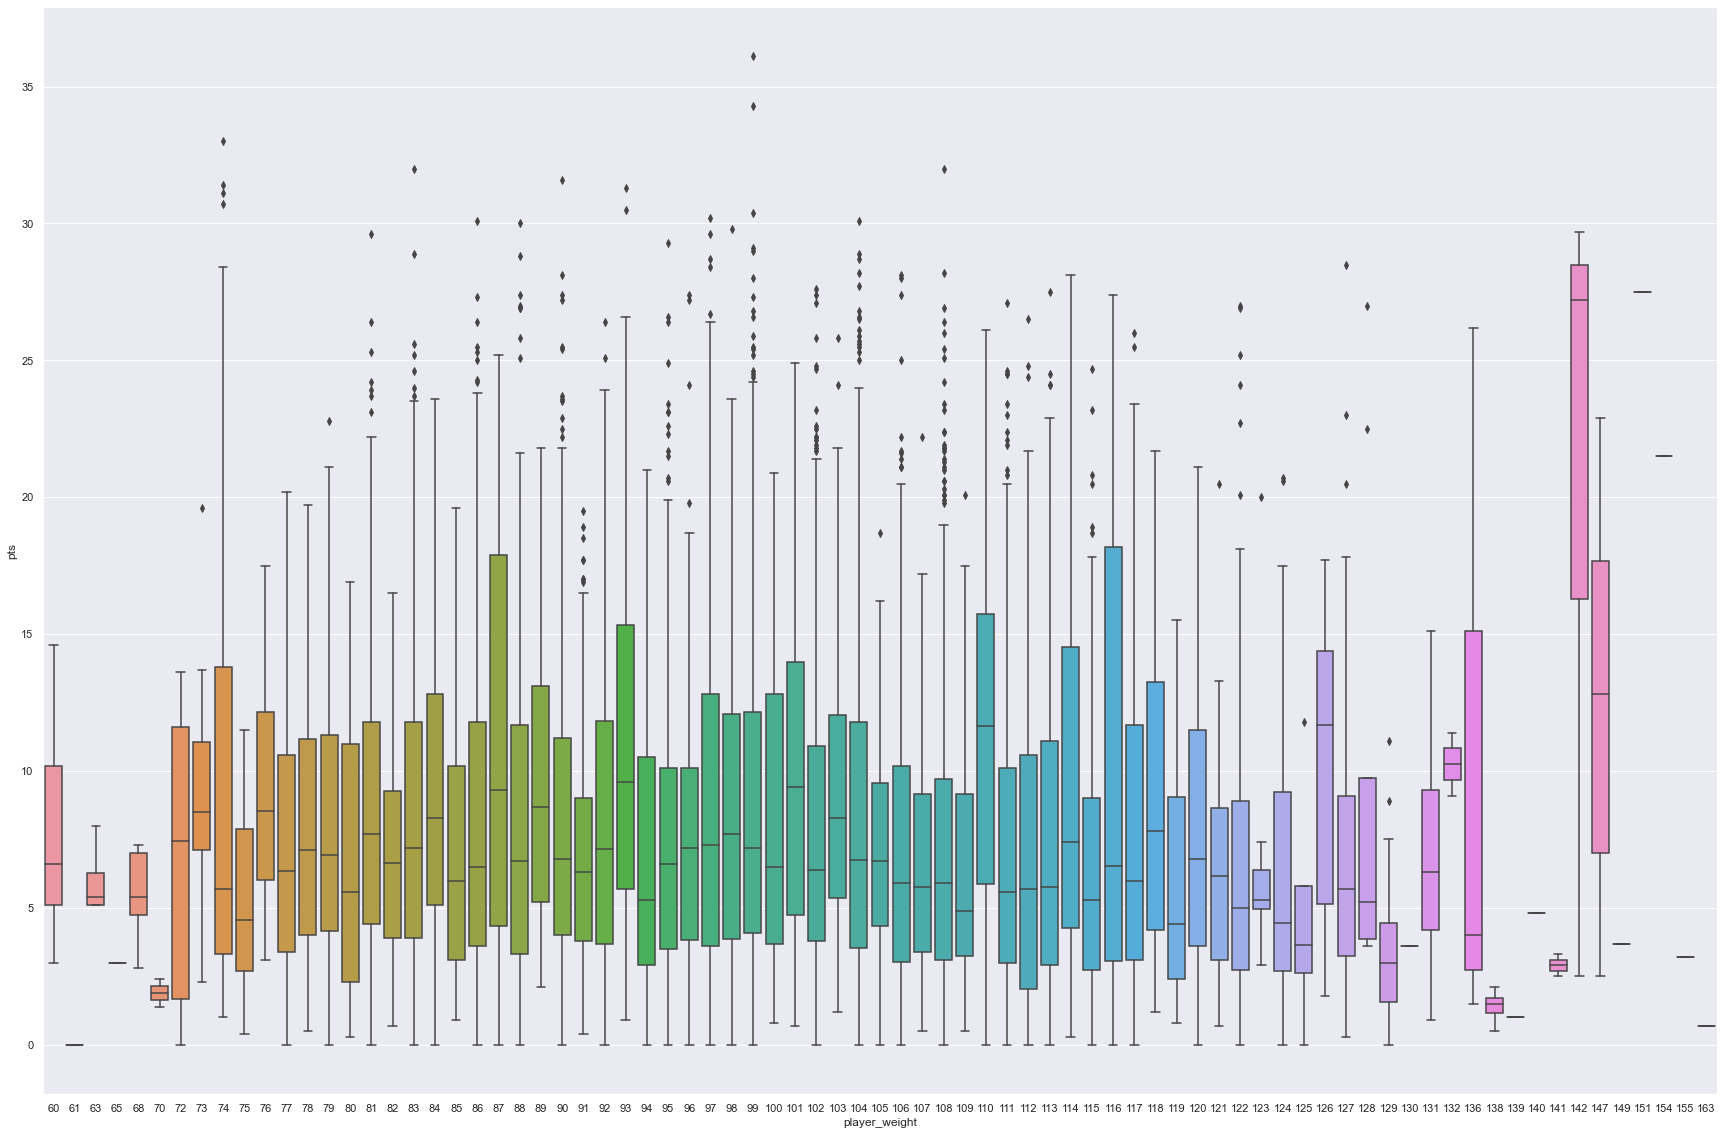

In [15]:
f = plt.figure(figsize=(30, 20))
sb.boxplot(y = 'pts', x = 'player_weight', data = cleaned_nba)

In [16]:
cleaned_nba['player_height'] = cleaned_nba.player_height.astype(int)
cleaned_nba['pts'] = cleaned_nba.pts.astype(int)

<AxesSubplot:xlabel='player_height', ylabel='pts'>

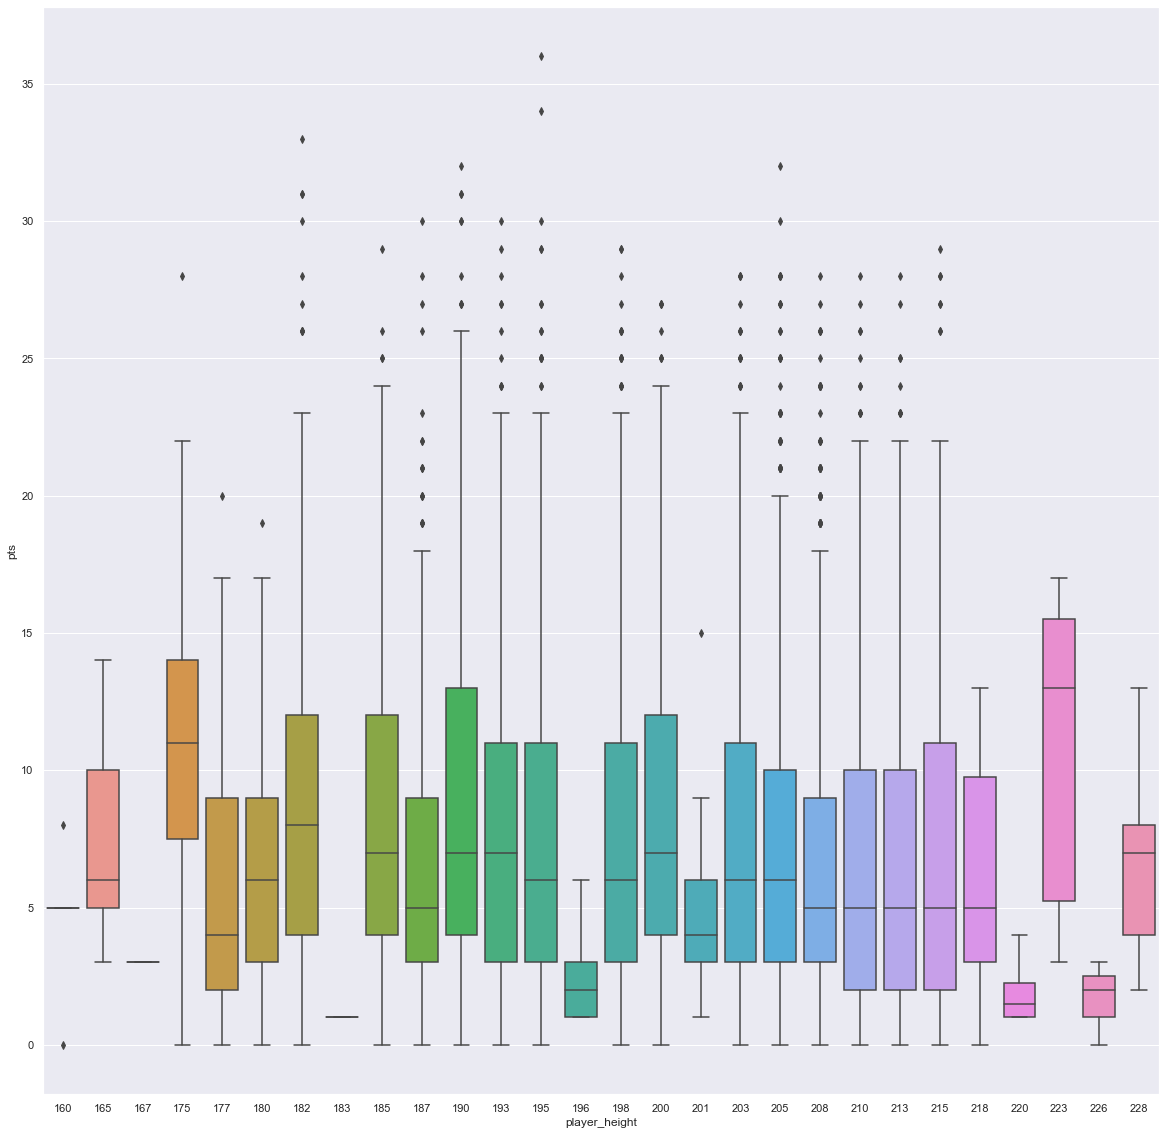

In [17]:
f = plt.figure(figsize=(20, 20))
sb.boxplot(y = 'pts', x = 'player_height', data = cleaned_nba)

In [18]:
cleaned_nba.pts

0         4
1         0
2         4
3         7
5         1
         ..
11695     2
11696     5
11697     6
11698    13
11699    12
Name: pts, Length: 9984, dtype: int32

not much correlation between weight and height, against pts scored

# Analysing games played (gp) vs pts scored

<AxesSubplot:xlabel='gp', ylabel='pts'>

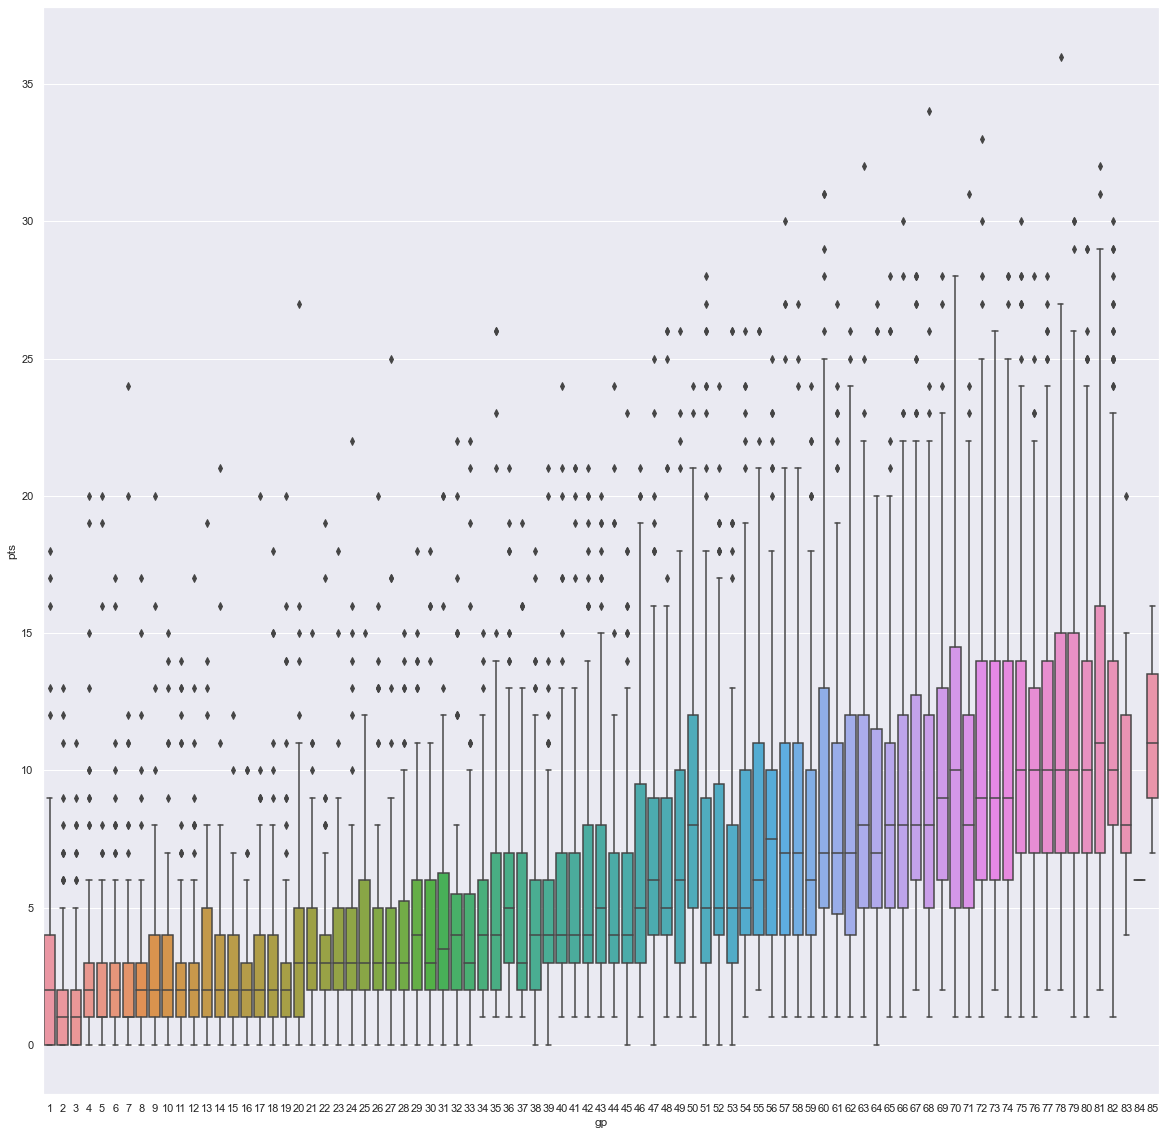

In [19]:
f = plt.figure(figsize=(20, 20))
sb.boxplot(y = 'pts', x = 'gp', data = cleaned_nba)

There is a good trend that the more games played, the higher pts scored

# Examining usage percentage vs pts

In [20]:
f = plt.figure(figsize=(180, 180))
sb.boxplot(y = 'pts', x = 'usg_pct', data = cleaned_nba)

<AxesSubplot:xlabel='usg_pct', ylabel='pts'>

# Cleaning up the data

In [21]:
cleaned_nba.usg_pct

0        0.142
1        0.265
2        0.151
3        0.167
5        0.135
         ...  
11695    0.125
11696    0.114
11697    0.179
11698    0.194
11699    0.204
Name: usg_pct, Length: 9984, dtype: float64

In [22]:
cleaned_nba['usg_pct'] = cleaned_nba.usg_pct *100

In [23]:
cleaned_nba.usg_pct

0        14.2
1        26.5
2        15.1
3        16.7
5        13.5
         ... 
11695    12.5
11696    11.4
11697    17.9
11698    19.4
11699    20.4
Name: usg_pct, Length: 9984, dtype: float64

In [24]:
cleaned_nba['usg_pct'] = cleaned_nba.usg_pct.astype(int)

In [25]:
cleaned_nba.usg_pct

0        14
1        26
2        15
3        16
5        13
         ..
11695    12
11696    11
11697    17
11698    19
11699    20
Name: usg_pct, Length: 9984, dtype: int32

<AxesSubplot:xlabel='usg_pct', ylabel='pts'>

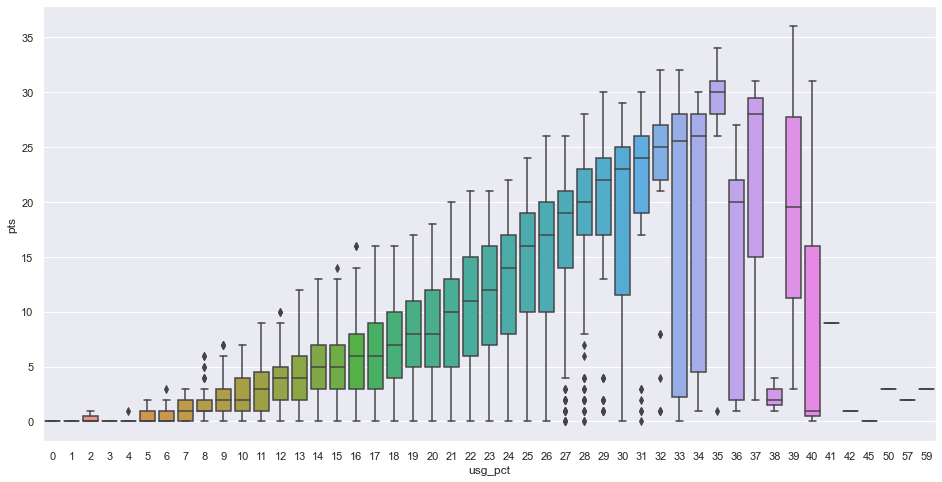

In [35]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(y = 'pts', x = 'usg_pct', data = cleaned_nba)